In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
data = pd.read_csv("2014_nyc_taxi_trips_neighbor_final.csv")

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


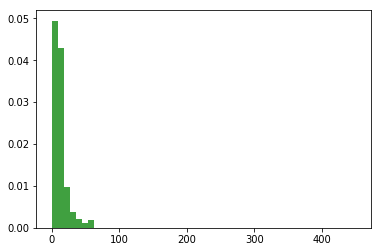

In [4]:
n, bins, patches = plt.hist(data.fare_amount, 50, normed=1, facecolor='green', alpha=0.75)

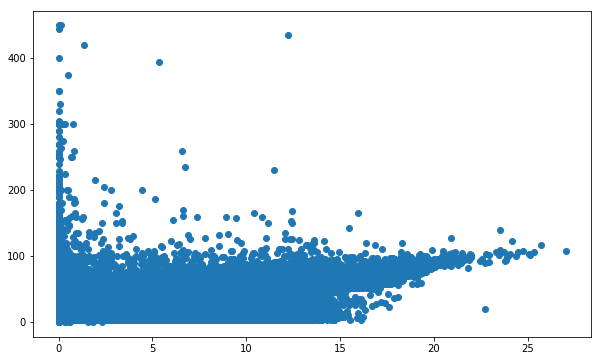

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(data.distance, data.fare_amount)

In [3]:
# function to remove outlier 
def remove_outlier(df, var):
    # find Q1 and Q3 and IQR
    Q1, Q3 = df[var].quantile(0.25), df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    # find the data within desired range
    df = df[(df[var] >= lower) & (df[var] <= upper)]
    return df

data_cleaned = remove_outlier(data, 'fare_amount')

In [4]:
data_cleaned = data_cleaned[['fare_amount', 'passenger_count', 'weekday', 'weekend', 'day_night', 'distance', 'tripPerHour','holiday', 'neighborhood','datekey']]

In [117]:
data_cleaned.corr()

,fare_amount,passenger_count,weekday,weekend,day_night,distance,tripPerHour,holiday
fare_amount,1.000000,0.012281,0.010500,-0.003992,-0.038432,0.839793,0.006042,-0.011842
passenger_count,0.012281,1.000000,0.026312,0.029125,-0.023111,0.007143,0.017930,0.004725
weekday,0.010500,0.026312,1.000000,0.786019,-0.092909,0.039282,0.024704,-0.086888
weekend,-0.003992,0.029125,0.786019,1.000000,-0.087307,0.046943,-0.037045,-0.056646
day_night,-0.038432,-0.023111,-0.092909,-0.087307,1.000000,-0.142569,-0.133345,-0.002608
distance,0.839793,0.007143,0.039282,0.046943,-0.142569,1.000000,-0.058547,0.006306
tripPerHour,0.006042,0.017930,0.024704,-0.037045,-0.133345,-0.058547,1.000000,-0.095899
holiday,-0.011842,0.004725,-0.086888,-0.056646,-0.002608,0.006306,-0.095899,1.000000


In [118]:
data.corr()

,Unnamed: 0,fare_amount,passenger_count,weekday,weekend,day_night,distance,tripPerHour,holiday
Unnamed: 0,1.000000,0.014078,-0.004976,0.005083,0.007818,-0.004814,0.028034,-0.291350,0.035355
fare_amount,0.014078,1.000000,0.017224,-0.003303,-0.012789,0.007452,0.910132,-0.046581,0.000660
passenger_count,-0.004976,0.017224,1.000000,0.025301,0.028032,-0.020596,0.013715,0.016732,0.004828
weekday,0.005083,-0.003303,0.025301,1.000000,0.785597,-0.090297,0.014830,0.023526,-0.087643
weekend,0.007818,-0.012789,0.028032,0.785597,1.000000,-0.085627,0.017852,-0.039176,-0.055918
day_night,-0.004814,0.007452,-0.020596,-0.090297,-0.085627,1.000000,-0.059696,-0.125827,-0.002370
distance,0.028034,0.910132,0.013715,0.014830,0.017852,-0.059696,1.000000,-0.079200,0.010559
tripPerHour,-0.291350,-0.046581,0.016732,0.023526,-0.039176,-0.125827,-0.079200,1.000000,-0.095413
holiday,0.035355,0.000660,0.004828,-0.087643,-0.055918,-0.002370,0.010559,-0.095413,1.000000


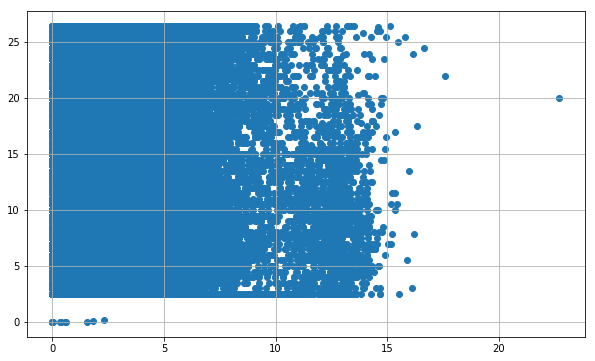

In [45]:
plt.figure(figsize=(10, 6))
plt.grid(b=True)
plt.scatter(data_cleaned.distance, data_cleaned.fare_amount)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


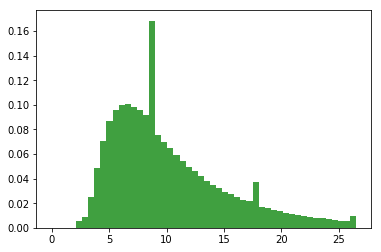

In [34]:
n, bins, patches = plt.hist(data_cleaned.fare_amount, 50, normed=1, facecolor='green', alpha=0.75)

In [5]:
n1 = list(i.split(',')[0][2:-1] for i in data_cleaned.neighborhood)
n2 = list(i.split(',')[1][2:-2] for i in data_cleaned.neighborhood)
data_cleaned['pickup_neighbor'] = n1
data_cleaned['dropoff_neighbor'] = n2

In [6]:
data_cleaned.head()

,fare_amount,passenger_count,weekday,weekend,day_night,distance,tripPerHour,holiday,neighborhood,datekey,pickup_neighbor,dropoff_neighbor
0,12.5,1,2,0,1,1.619554,1066,0,"('Theater District', 'Gramercy')",2014-02-19-07,Theater District,Gramercy
1,10.5,1,2,0,1,1.789184,1066,0,"('Upper East Side', 'Murray Hill')",2014-02-19-07,Upper East Side,Murray Hill
2,8.0,1,2,0,1,1.697914,1066,0,"('Gramercy', 'Midtown')",2014-02-19-07,Gramercy,Midtown
3,20.5,2,2,0,1,1.720657,1066,0,"('Upper East Side', 'Midtown')",2014-02-19-07,Upper East Side,Midtown
4,25.0,1,2,0,1,4.554564,1066,0,"('Upper East Side', 'Battery Park City')",2014-02-19-07,Upper East Side,Battery Park City


In [6]:
data_cleaned = data_cleaned[['fare_amount', 'passenger_count', 'weekday', 'weekend', 'day_night', 'distance', 'tripPerHour',
                            'holiday', 'datekey', 'pickup_neighbor', 'dropoff_neighbor']]

In [7]:
data_cleaned.shape

(7344356, 11)

In [11]:
# linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X, Y = data_cleaned.distance, data_cleaned.fare_amount
train_x, train_y = np.array(X[:7300000]).reshape(-1,1), Y[:7300000]
test_x, test_y = np.array(X[7300000:]).reshape(-1,1), Y[7300000:]

In [12]:
reg = LinearRegression().fit(train_x, train_y)
pred = reg.predict(test_x)
print(reg.score(test_x, test_y))

0.7186903554501782


In [13]:
# lasso
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1).fit(train_x, train_y)
print(clf.score(test_x, test_y))

0.7255069607482356


In [9]:
# decision tree
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_cleaned['datekey'] = le.fit_transform(data_cleaned.datekey)
data_cleaned['pickup_neighbor'] = le.fit_transform(data_cleaned.pickup_neighbor)
data_cleaned['dropoff_neighbor'] = le.fit_transform(data_cleaned.dropoff_neighbor)
data_cleaned.head()

,fare_amount,passenger_count,weekday,weekend,day_night,distance,tripPerHour,holiday,datekey,pickup_neighbor,dropoff_neighbor
0,12.5,1,2,0,1,1.619554,1066,0,1183,201,97
1,10.5,1,2,0,1,1.789184,1066,0,1183,210,147
2,8.0,1,2,0,1,1.697914,1066,0,1183,97,137
3,20.5,2,2,0,1,1.720657,1066,0,1183,210,137
4,25.0,1,2,0,1,4.554564,1066,0,1183,210,5


In [17]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
X, Y = data_cleaned[data_cleaned.columns[1:]], data_cleaned.fare_amount
train_x, train_y = X[:7300000], Y[:7300000]
test_x, test_y = X[7300000:], Y[7300000:]
clf = clf.fit(train_x, train_y)
clf.score(test_x, test_y)

0.7008260726199007

In [24]:
# ensemble method
from sklearn.ensemble import RandomForestRegressor
X, Y = data_cleaned[data_cleaned.columns[1:]], data_cleaned.fare_amount
train_x, train_y = X[:7300000], Y[:7300000]
test_x, test_y = X[7300000:], Y[7300000:]
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(train_x, train_y)
regr.score(test_x, test_y)

0.7124593745134042